# Sentiment Analysis

### Supervised Learning

In [1]:
import os
import re
import string
from unidecode import unidecode
import pandas as pd
import torch
import sys

In [2]:
data_path = os.path.join('dati', 'betsentiment-IT-tweets-sentiment-players.csv')
dati = pd.read_csv(data_path, encoding='latin-1')

In [3]:
dati.columns

Index(['tweet_date_created', 'tweet_id', 'tweet_text', 'language', 'sentiment',
       'sentiment_score'],
      dtype='object')

In [4]:
dati.head()

,tweet_date_created,tweet_id,tweet_text,language,sentiment,sentiment_score
0,2018-12-10T10:45:40.865000,1072079899224100865,"@juventusfc @G_Higuain Auguri pipita,sempre co...",it,NEUTRAL,"{""Neutral"":0.858726024627685546875,""Negative"":..."
1,2018-06-30T18:41:02.817000,1013130303454498817,@realvarriale @massimozampini @KMbappe @G_Higu...,it,NEUTRAL,"{""Neutral"":0.973993778228759765625,""Negative"":..."
2,2018-12-26T19:40:44.308000,1078012758069858308,@OfficialASRoma @D_10Perotti @Hyundai_Italia S...,it,NEUTRAL,"{""Neutral"":0.9844334125518798828125,""Negative""..."
3,2018-07-12T11:26:37.766000,1017369635816181766,@CarloRienzi @Cristiano @juventusfc Populismo ...,it,NEUTRAL,"{""Neutral"":0.993849217891693115234375,""Negativ..."
4,2018-06-12T19:20:36,1006617282779451392,@OfficialASRoma @OfficialRadja @leonsfdo non c...,it,NEUTRAL,"{""Neutral"":0.87245881557464599609375,""Negative..."


In [5]:
dati['sentiment_score'][0]

'{"Neutral":0.858726024627685546875,"Negative":0.00167082459665834903717041015625,"Positive":0.13944680988788604736328125,"Mixed":0.000156317240907810628414154052734375}'

In [6]:
dati['sentiment']

0         NEUTRAL
1         NEUTRAL
2         NEUTRAL
3         NEUTRAL
4         NEUTRAL
           ...   
165810    NEUTRAL
165811    NEUTRAL
165812    NEUTRAL
165813    NEUTRAL
165814    NEUTRAL
Name: sentiment, Length: 165815, dtype: object

In [7]:
set(dati['sentiment'])

{'MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'}

In [8]:
dati['tweet_text'][0]

'@juventusfc @G_Higuain Auguri pipita,sempre con noi'

In [9]:
found = re.search('[a-z]', dati['tweet_text'][0])

In [10]:
if found:
    print(found.group(0))

j


In [11]:
print('b\n', r'b\n')

b
 b\n


In [12]:
# Proviamo solo minuscole per ora, per efficienza.
# Essendo tweet, tutto maiuscolo potrebbe essere significativo.
clean_text = re.sub(r'[^a-zàáèéíìòóùú0-9]', ' ', dati['tweet_text'][4876].lower())
clean_text = re.sub(r'\s+', ' ', clean_text).strip()

In [13]:
clean_text

'narkos92 g apicella vannaboba sscnapoli ecavaniofficial ieri era fatta oggi si deve ridursi l ingaggio bah la vedo strana come cosa'

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
re.sub(r'[^a-z]', ' ', 'à')

' '

In [16]:
for idx, tweet in enumerate(dati['tweet_text']):
    if any(char in tweet for char in 'àáèéíìòóùú'):
        print(idx, tweet)
        break

4 @OfficialASRoma @OfficialRadja @leonsfdo non ce posso pensa non giochiamo #Radjanonsitocca non facciamo paragoni con altri giocatori andati lui per Roma è un altra cosa https://t.co/rgscxanuqh


In [17]:
clean_text = re.sub(r'@[a-z0-9]+\b', ' ', dati['tweet_text'][4].lower())
clean_text = re.sub(r'[^a-zàáèéíìòóùú0-9]', ' ', clean_text)
clean_text = re.sub(r'\s+', ' ', clean_text).strip()
clean_text = unidecode(clean_text)

In [18]:
clean_text

'non ce posso pensa non giochiamo radjanonsitocca non facciamo paragoni con altri giocatori andati lui per roma e un altra cosa https t co rgscxanuqh'

In [19]:
def clean_text(text: str):
    clean_text = re.sub(r'@[a-z0-9]+\b', ' ', text.lower())
    clean_text = re.sub(r'[^a-zàáèéíìòóùú0-9]', ' ', clean_text)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    clean_text = unidecode(clean_text)
    return clean_text

### Tokenisation

In [20]:
vocab = {'0': 0}
for tweet in dati['tweet_text']:
    pulito = clean_text(tweet).split()
    for word in pulito:
        if word not in vocab:
            vocab[word] = len(vocab)

In [21]:
vocab

{'0': 0,
 'g': 1,
 'higuain': 2,
 'auguri': 3,
 'pipita': 4,
 'sempre': 5,
 'con': 6,
 'noi': 7,
 'paudybala': 8,
 'jr': 9,
 'nano': 10,
 'puttano': 11,
 'd': 12,
 '10perotti': 13,
 'hyundai': 14,
 'italia': 15,
 'stasera': 16,
 'bravissimi': 17,
 'tutti': 18,
 'una': 19,
 'menzione': 20,
 'per': 21,
 'il': 22,
 'capitano': 23,
 'lucido': 24,
 'ed': 25,
 'onnipresente': 26,
 'populismo': 27,
 'di': 28,
 'basso': 29,
 'spessore': 30,
 'non': 31,
 'ce': 32,
 'posso': 33,
 'pensa': 34,
 'giochiamo': 35,
 'radjanonsitocca': 36,
 'facciamo': 37,
 'paragoni': 38,
 'altri': 39,
 'giocatori': 40,
 'andati': 41,
 'lui': 42,
 'roma': 43,
 'e': 44,
 'un': 45,
 'altra': 46,
 'cosa': 47,
 'https': 48,
 't': 49,
 'co': 50,
 'rgscxanuqh': 51,
 'stop': 52,
 'altrimenti': 53,
 'tanto': 54,
 'vale': 55,
 'prendere': 56,
 'immobikeno': 57,
 'belotti': 58,
 'gli': 59,
 '50': 60,
 'dove': 61,
 'li': 62,
 'prendi': 63,
 'sei': 64,
 'cane': 65,
 'piccola': 66,
 'cagna': 67,
 'spaventata': 68,
 'vorrei': 69,


### One-hot encoding

In [22]:
clean_text = re.sub(r'@[a-z0-9]+\b', ' ', dati['tweet_text'][4].lower())
clean_text = re.sub(r'[^a-zàáèéíìòóùú0-9]', ' ', clean_text)
clean_text = re.sub(r'\s+', ' ', clean_text).strip()
clean_text = unidecode(clean_text)

In [23]:
clean_text

'non ce posso pensa non giochiamo radjanonsitocca non facciamo paragoni con altri giocatori andati lui per roma e un altra cosa https t co rgscxanuqh'

In [24]:
splitted = clean_text.split()
token_text = []
for word in splitted:
    token_text.append(vocab[word])

In [25]:
vocab['terrapiatta']

KeyError: 'terrapiatta'

In [26]:
vocab.get('terrapiatta') == None

True

In [27]:
splitted = clean_text.split()
token_text = []
for word in splitted:
    token_text.append(vocab.get(word, 0))

In [28]:
' '.join(str(token) for token in token_text)

'31 32 33 34 31 35 36 31 37 38 6 39 40 41 42 21 43 44 45 46 47 48 49 50 51'

In [29]:
token_text = [vocab.get(word, 0) for word in clean_text.split()]

In [30]:
' '.join(str(token) for token in token_text)

'31 32 33 34 31 35 36 31 37 38 6 39 40 41 42 21 43 44 45 46 47 48 49 50 51'

In [31]:
torch_text = torch.zeros((len(token_text), len(vocab)))

In [32]:
torch_text.shape

torch.Size([25, 111053])

In [33]:
for row, token in zip(torch_text, token_text):
    row[token] = 1.0

In [34]:
torch_text[0, 30:40]

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [35]:
testi = ['Il gatto e nero', 'Il cane mangia','Davide mangia il porco con il pane']

In [36]:
v = {}
for testo in testi:
    for parola in testo.split():
        if parola not in v:
            v.update({parola: len(v)})

In [37]:
v

{'Il': 0,
 'gatto': 1,
 'e': 2,
 'nero': 3,
 'cane': 4,
 'mangia': 5,
 'Davide': 6,
 'il': 7,
 'porco': 8,
 'con': 9,
 'pane': 10}

In [38]:
token_testo = [[v[parola] for parola in testo.split()] for testo in testi]

In [39]:
token_testo

[[0, 1, 2, 3], [0, 4, 5], [6, 5, 7, 8, 9, 7, 10]]

In [40]:
torch_testo = torch.zeros((len(token_testo[0]), len(v)))
torch_testo

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
for riga, token in zip(torch_testo, token_testo[0]):
    riga[token] = 1.0
torch_testo

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [42]:
sys.getsizeof(torch_text.storage())

11105356

### Bag of Words

Invece di usare un indice per ogni parola, si usa il conteggio della parola nel testo. Esempio <a>https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=countvectorizer#sklearn.feature_extraction.text.CountVectorizer</a>

### Embedding

In [129]:
import torch.nn as nn

class TextClassifier(nn.Module):
    def __init__(self, config):
        super(TextClassifier, self).__init__()
        
        num_emb = config['num_emb']
        emb_dim = config['emb_dim']
        conv_out = config['conv_out']
        kernel_size = config['kernel_size']
        seq_len = config['seq_len']
        self.emb = nn.Embedding(num_emb, emb_dim)
        self.conv = nn.Conv1d(emb_dim, conv_out, kernel_size)
        self.fc = nn.Linear(conv_out*self.__output(kernel_size, seq_len))
    
    
    def __output(self, kernel_size, seq_len):
        return seq_len - kernel_size + 1

In [131]:
config = {
    'num_emb': len(vocab),
    'emb_dim': 300, # Hyperparameter iperparametro
    'conv_out': 100,
    'kernel_size': 3,
    'seq_len': 53,
    'n_classes': 4
}

In [49]:
def clean_text(text: str):
    clean_text = re.sub(r'@[a-z0-9]+\b', ' ', text.lower())
    clean_text = re.sub(r'[^a-zàáèéíìòóùú0-9]', ' ', clean_text)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    clean_text = unidecode(clean_text)
    return clean_text

In [50]:
clean_texts = [clean_text(tweet) for tweet in dati['tweet_text']]

In [51]:
token_text = [[vocab.get(word, 0) for word in text.split()] for text in clean_texts]

In [52]:
max_len = max(len(frase) for frase in token_text)

In [53]:
x = [len(frase) for frase in token_text]

In [54]:
import matplotlib.pyplot as plt

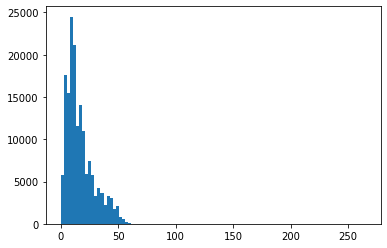

In [71]:
fig = plt.hist(x, 100)

In [77]:
y = sorted(x, reverse=True)
y

[265,
 138,
 76,
 74,
 74,
 69,
 67,
 66,
 66,
 65,
 65,
 65,
 65,
 65,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 63,
 63,
 63,
 63,
 63,
 63,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 62,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 60,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 59,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56

In [57]:
sum(x)

2775775

In [58]:
25000/2775775

0.009006493681944682

In [59]:
altezze = [1.78, 1.74, 1.79, 1.73]

In [60]:
sum(altezze)/4

1.7600000000000002

In [61]:
altezze_2 = [1.60, 1.92, 1.70, 1.82]

In [62]:
sum(altezze)/4

1.7600000000000002

In [63]:
import numpy as np

In [64]:
np.std(altezze)

0.025495097567963948

In [65]:
np.std(altezze_2)

0.12083045973594568

In [66]:
np.mean(x) + 3*np.std(x)

52.84616033095599

In [67]:
np.mean(x) - 3*np.std(x)

-19.365775564800934

In [68]:
18/37

0.4864864864864865

In [69]:
1000000*18/37

486486.4864864865

In [76]:
fig[0][53:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [78]:
from collections import Counter

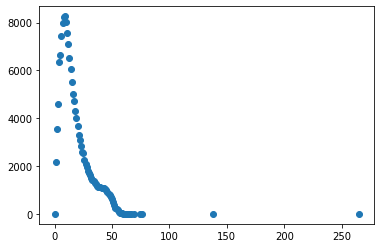

In [84]:
counts = Counter(x)
plt.scatter(list(counts.keys()), list(counts.values()))

In [105]:
f = lambda x: x[0]
x_sort = sorted(counts.items(), key=lambda x: x[0])
x_np = np.array([np.array(t) for t in x_sort])
np.sum(x_np[:config['seq_len'], 1])/np.sum(x_np[:, 1])

0.9944757711907849

In [126]:
torch_tokens = torch.zeros((len(token_text), config['seq_len']), dtype=torch.int64)
for fid, frase in enumerate(token_text):
    for pid, parola in enumerate(frase[:53]):
        torch_tokens[fid, pid] = parola

In [127]:
torch_tokens.dtype

torch.int64

In [167]:
config = {
    'num_emb': len(vocab),
    'emb_dim': 300, # Hyperparameter iperparametro
    'conv_out': 100,
    'kernel_size': 3,
    'n_epochs': 3,
    'batch_size': 512,
    'seq_len': 53,
    'n_classes': 4
}

In [143]:
class TextClassifier(nn.Module):
    def __init__(self, config):
        super(TextClassifier, self).__init__()
        
        num_emb = config['num_emb']
        emb_dim = config['emb_dim']
        conv_out = config['conv_out']
        kernel_size = config['kernel_size']
        seq_len = config['seq_len']
        n_classes = config['n_classes']
        self.emb = nn.Embedding(num_emb, emb_dim)
        self.conv = nn.Conv1d(emb_dim, conv_out, kernel_size)
        self.fc = nn.Linear(conv_out*self.__output(kernel_size, seq_len), n_classes)
    
    
    def forward(self, x):
        x = self.emb(x)
        x = torch.transpose(x, 1, 2)
        x = self.conv(x)
        x = torch.reshape(x, (x.shape[0], x.shape[1]*x.shape[2]))
        x = self.fc(x)
        return x
    
    def __output(self, kernel_size, seq_len):
        return seq_len - kernel_size + 1

In [171]:
tc = TextClassifier(config)
loss = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(tc.parameters())

In [149]:
from sklearn.model_selection import train_test_split

In [158]:
sentiment_to_id = {'MIXED': 0, 'NEGATIVE': 1, 'NEUTRAL': 2, 'POSITIVE': 3}
labels = [sentiment_to_id[s] for s in dati['sentiment']]
torch_labels = torch.tensor(labels, dtype=torch.int64)

In [159]:
x_train, x_test, y_train, y_test = train_test_split(torch_tokens, torch_labels)

In [169]:
!pip install tensorboard

     |████████████████████████████████| 10.6 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 136 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 285 kB/s eta 0:00:01
     |████████████████████████████████| 97 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 315 kB/s eta 0:00:01
     |████████████████████████████████| 155 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 2.1 MB/s eta 0:00:01
  Using cached requests-2.25.1-py2.py3-none-any.whl (61 kB)
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
     |████████████████████████████████| 147 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 198 kB/s eta 0:00:011
  Using cached urllib3-1.26.3-py2.py3-none-any.whl (137 kB)
     |█████████████████

In [175]:
from torch.utils.tensorboard import SummaryWriter
from time import time
writer = SummaryWriter()


# Qui comincia l'allenamento
batch_size = config['batch_size']
for epoch in range(config['n_epochs']):
    start = time()
    train_loss = []
    for batch in range(0, len(x_train), batch_size):
        optimiser.zero_grad()
        y_pred = tc(x_train[batch: batch+batch_size])
        l = loss(y_pred, y_train[batch: batch+batch_size])
        l.backward()
        optimiser.step()
        train_loss.append(l.item())
    test_loss = []
    for batch in range(0, len(x_test), batch_size):
        y_pred_test = tc(x_test[batch: batch+batch_size])
        l = loss(y_pred_test, y_test[batch: batch+batch_size])
        test_loss.append(l.item())
    print(f"Ci ho messo {time()- start:.1f} secondi per un'epoca")
    writer.add_scalars('Loss', {'Train': np.mean(train_loss),
                                'Test': np.mean(test_loss)}, epoch)
writer.close()

Ci ho messo 76.0 secondi per un'epoca
Ci ho messo 74.3 secondi per un'epoca
Ci ho messo 76.1 secondi per un'epoca
